In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from pathlib import Path


%matplotlib inline 

In [2]:
data_folder = Path.cwd().parent / "data/data_kmeans.parquet"


In [3]:
dataset = pd.read_parquet(data_folder)

In [4]:
dataset2 = dataset[dataset["modelo"]=="GRAND I10"].copy()
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56182 entries, 60462 to 116643
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   vin                     56182 non-null  object
 1   modelo                  56182 non-null  object
 2   visitas                 56182 non-null  int64 
 3   antiquity               56182 non-null  int64 
 4   ultimo_kilometraje      56182 non-null  int64 
 5   num_servicios           56182 non-null  int64 
 6   num_rep_llantas         56182 non-null  int64 
 7   num_rep_frenos          56182 non-null  int64 
 8   num_rep_amortiguadores  56182 non-null  int64 
 9   num_rep_transmision     56182 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.7+ MB


In [5]:
dataset2.reset_index(inplace=True)
dataset2.head()

,index,vin,modelo,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,60462,MALA74BC0FM057165,GRAND I10,1,113,94550,0,0,0,0,0
1,60463,MALA74BC0FM057313,GRAND I10,2,111,130233,0,0,0,0,0
2,60464,MALA74BC0FM057490,GRAND I10,1,114,51921,1,0,2,0,0
3,60465,MALA74BC0FM057506,GRAND I10,1,112,131489,1,0,0,0,0
4,60466,MALA74BC0FM063547,GRAND I10,6,110,66309,25,8,0,0,1


In [6]:

grand_i10_variables = dataset2.drop(['vin'], axis=1).drop(['modelo'], axis=1)
grand_i10_variables.head()


,index,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,60462,1,113,94550,0,0,0,0,0
1,60463,2,111,130233,0,0,0,0,0
2,60464,1,114,51921,1,0,2,0,0
3,60465,1,112,131489,1,0,0,0,0
4,60466,6,110,66309,25,8,0,0,1


In [7]:
grand_i10_variables.describe()

,index,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,56182.000000,56182.000000,56182.000000,5.618200e+04,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000
mean,88552.500000,3.412855,54.757146,6.882924e+04,4.577249,0.601474,0.126055,0.002474,0.035919
std,16218.490749,2.416645,28.711171,4.238509e+06,5.371330,2.257758,0.599260,0.060650,0.256404
min,60462.000000,1.000000,12.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74507.250000,2.000000,32.000000,8.492250e+03,2.000000,0.000000,0.000000,0.000000,0.000000
50%,88552.500000,3.000000,46.000000,2.784450e+04,3.000000,0.000000,0.000000,0.000000,0.000000
75%,102597.750000,5.000000,77.000000,6.048200e+04,6.000000,0.000000,0.000000,0.000000,0.000000
max,116643.000000,32.000000,121.000000,1.000000e+09,101.000000,37.000000,15.000000,3.000000,8.000000


### Normalizando los datos

In [8]:
data_normalizada = (grand_i10_variables-grand_i10_variables.min()) / (grand_i10_variables.max()-grand_i10_variables.min())
data_normalizada.describe()


,index,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000
mean,0.500000,0.077834,0.392267,0.000069,0.045319,0.016256,0.008404,0.000825,0.004490
std,0.288683,0.077956,0.263405,0.004239,0.053181,0.061020,0.039951,0.020217,0.032051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.032258,0.183486,0.000008,0.019802,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.064516,0.311927,0.000028,0.029703,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.129032,0.596330,0.000060,0.059406,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Búsqueda de la cantidad optima de clusters
- calculo de la similitud de los individuos dentro de los clusters

In [9]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_normalizada)
    wcss.append(kmeans.inertia_)

### Gráfica del codo de Jambú

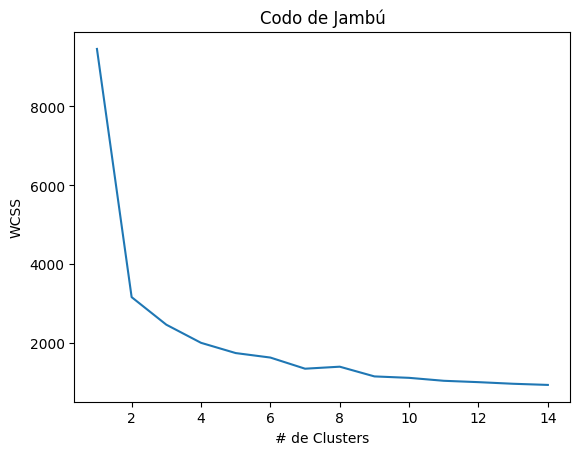

In [10]:
plt.plot(range(1,15), wcss)
plt.title("Codo de Jambú")
plt.xlabel("# de Clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(data_normalizada) ## Aplica el modelo a la base

KMeans(n_clusters=5)

In [12]:
print(clustering.inertia_)

1753.9506313189545


### Aquí se agrega la clasificación al archivo original

In [13]:
dataset2["KMeans_Clustering"] = clustering.labels_
print(clustering.labels_)
dataset2.head()

[1 1 1 ... 2 2 2]


,index,vin,modelo,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision,KMeans_Clustering
0,60462,MALA74BC0FM057165,GRAND I10,1,113,94550,0,0,0,0,0,1
1,60463,MALA74BC0FM057313,GRAND I10,2,111,130233,0,0,0,0,0,1
2,60464,MALA74BC0FM057490,GRAND I10,1,114,51921,1,0,2,0,0,1
3,60465,MALA74BC0FM057506,GRAND I10,1,112,131489,1,0,0,0,0,1
4,60466,MALA74BC0FM063547,GRAND I10,6,110,66309,25,8,0,0,1,4


### Visualizando los clusters
- Utilizando PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_normalizada)
pca_df = pd.DataFrame(data=pca_results, columns=["Componente_1", "Componente_2"])
pca_df_clusters = pd.concat([pca_df, dataset2[["KMeans_Clustering"]]], axis=1)
pca_df_clusters


,Componente_1,Componente_2,KMeans_Clustering
0,-0.724591,0.070315,1
1,-0.713241,0.056370,1
2,-0.732553,0.078471,1
3,-0.718658,0.063494,1
4,-0.720888,0.052327,4
...,...,...,...
56177,0.618548,0.057156,2
56178,0.636905,0.036502,2
56179,0.636752,0.036538,2
56180,0.636932,0.036525,2


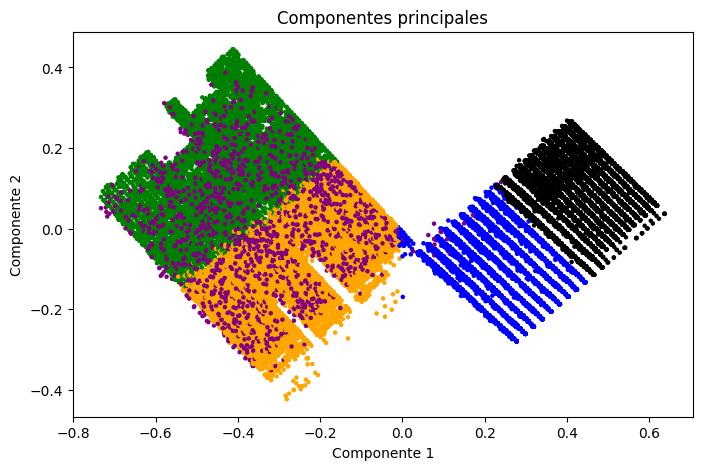

In [15]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Componentes principales")

color_theme = np.array(["blue","green", "black","orange", "purple"])
ax.scatter(x=pca_df_clusters.Componente_1, y=pca_df_clusters.Componente_2,
          c=color_theme[pca_df_clusters.KMeans_Clustering], s=5)

plt.show()


In [16]:
output_folder = Path.cwd().parent.parent / "loader/data_output_kmeans.csv" 
dataset2.to_csv(output_folder)